In [1]:
# pip install shap

Results for Logistic Regression:
Accuracy: 0.9518902156645505
Confusion Matrix:
 [[83183  1955]
 [ 6252 79199]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85138
           1       0.98      0.93      0.95     85451

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Cross-validation scores for Logistic Regression: [0.95248025 0.95198975 0.9522661  0.95216561 0.95263039]
Average score: 0.9523064202586495


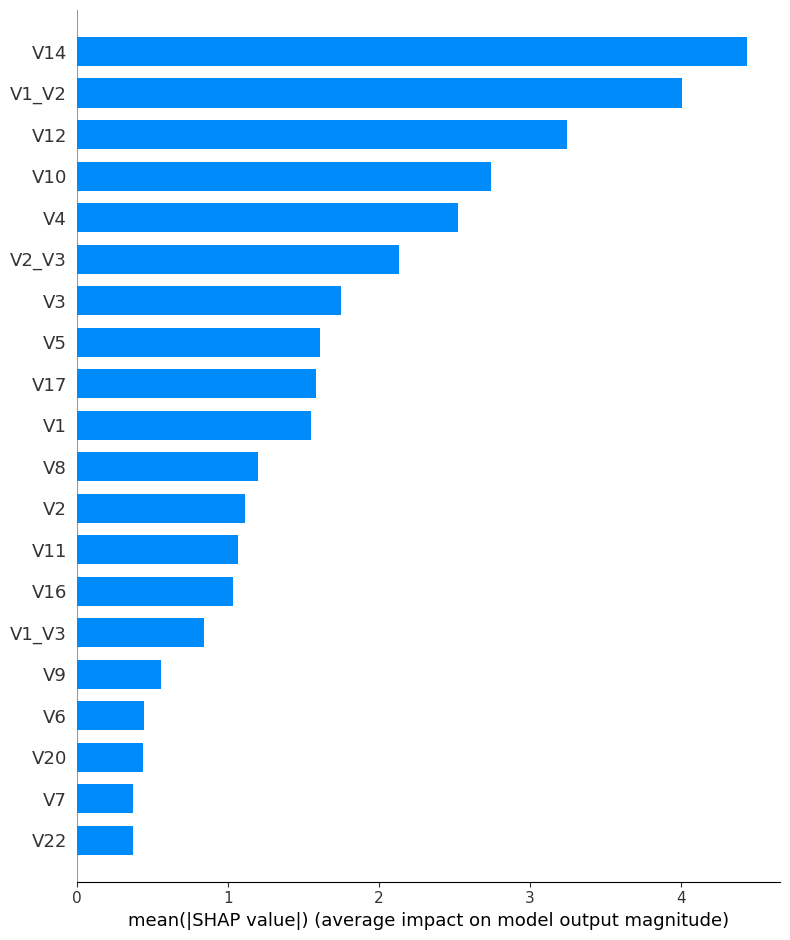

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
import shap

#dataset
data = pd.read_csv('creditcard.csv')

#feature engineering
#interaction terms
data['V1_V2'] = data['V1'] * data['V2']
data['V1_V3'] = data['V1'] * data['V3']
data['V2_V3'] = data['V2'] * data['V3']

#nomalizing 'Amount'
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'], axis=1)

#handling of imbalanced dataset
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]
fraud_upsampled = resample(fraud, replace=True, n_samples=len(non_fraud), random_state=42)
upsampled = pd.concat([non_fraud, fraud_upsampled])

#splitting dataset
X = upsampled.drop('Class', axis=1)
y = upsampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#models used
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    #'Random Forest': RandomForestClassifier(),
    #'SVM': SVC()
}

#hyperparameter tuning
params = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    #'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']},
    #'SVM': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
}

best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[name] = grid_search.best_estimator_

#evaluation of model
for name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

#cross-validation
for name, model in best_estimators.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Average score: {np.mean(scores)}")

#SHAP
for name, model in best_estimators.items():
    if name == 'SVM': #only for svm since requires the use of KernelExplainer to handle SVM models
        explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled)
        shap_values = explainer.shap_values(X_test_scaled)
    else:
        explainer = shap.Explainer(model, X_train_scaled)
        shap_values = explainer(X_test_scaled)

    shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar")


In [3]:
#models used
models = {
    #'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    #'SVM': SVC()
}

#hyperparameter tuning
params = {
    #'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']},
    #'SVM': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
}

best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[name] = grid_search.best_estimator_

#evaluation of model
for name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

#cross-validation
for name, model in best_estimators.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Average score: {np.mean(scores)}")

#SHAP
for name, model in best_estimators.items():
    if name == 'SVM': #only for svm since requires the use of KernelExplainer to handle SVM models
        explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled)
        shap_values = explainer.shap_values(X_test_scaled)
    else:
        explainer = shap.Explainer(model, X_train_scaled)
        shap_values = explainer(X_test_scaled)

    shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar")


In [ ]:
models = {
    #'Logistic Regression': LogisticRegression(max_iter=1000),
    #'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)  # Enable probability for SVM to use with SHAP
}

params = {
    #'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    #'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
}
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[name] = grid_search.best_estimator_

for name, model in best_estimators.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

#cross validation
for name, model in best_estimators.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Average score: {np.mean(scores)}")

#SHAP
for name, model in best_estimators.items():
    if name == 'SVM': #only for svm since requires the use of KernelExplainer to handle SVM models
        explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled)
        shap_values = explainer.shap_values(X_test_scaled)
    else:
        explainer = shap.Explainer(model, X_train_scaled)
        shap_values = explainer(X_test_scaled)

    shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar")